Accuracy: 1.00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6804\1846623649.py:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


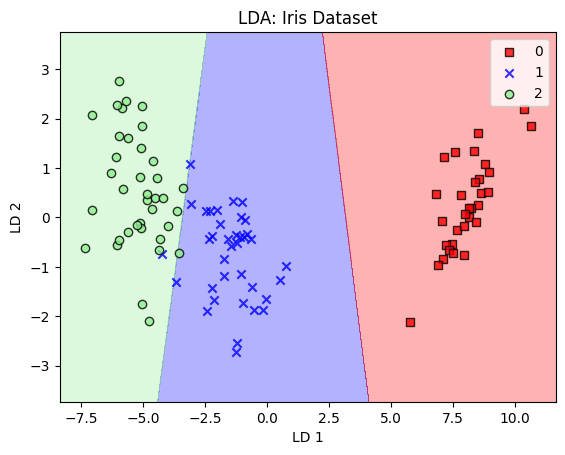

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# Train a classifier (e.g., Logistic Regression) on the transformed data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_lda)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

# Plot decision regions
plot_decision_regions(X_train_lda, y_train, classifier=clf)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.title('LDA: Iris Dataset')
plt.show()


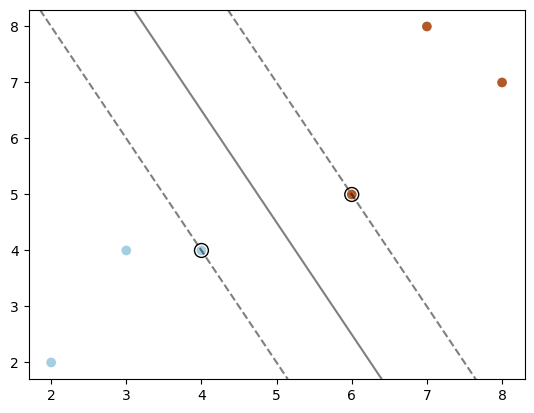

In [1]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

# Example Data
X = np.array([[3, 4], [2, 2], [4, 4], [7, 8], [6, 5], [8, 7]])
y = np.array([-1, -1, -1, 1, 1, 1])

# Create SVM model with a linear kernel
clf = svm.SVC(kernel='linear', C=1e10)  # Large C for hard-margin SVM

# Fit the model
clf.fit(X, y)

# Get the weight vector and bias term
w = clf.coef_[0]
b = clf.intercept_[0]

# Plotting the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


Accuracy of the original tree: 1.00
Accuracy of the pruned tree: 1.00


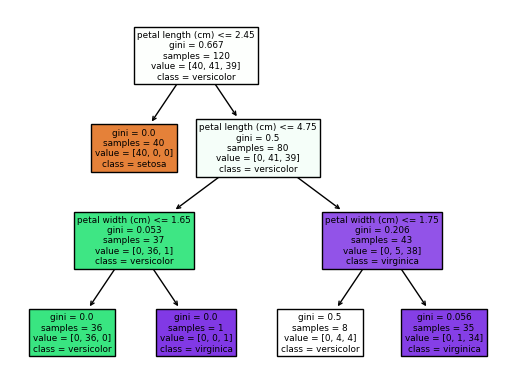

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import tree

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Visualize the decision tree (optional, requires Graphviz)
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

# Prune the decision tree (optional)
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.015, random_state=42)
pruned_tree.fit(X_train, y_train)

# Visualize the pruned decision tree
tree.plot_tree(pruned_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_pruned = pruned_tree.predict(X_test)

# Evaluate the model accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
accuracy_pruned = sum(y_pred_pruned == y_test) / len(y_test)

print(f"Accuracy of the original tree: {accuracy:.2f}")
print(f"Accuracy of the pruned tree: {accuracy_pruned:.2f}")


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



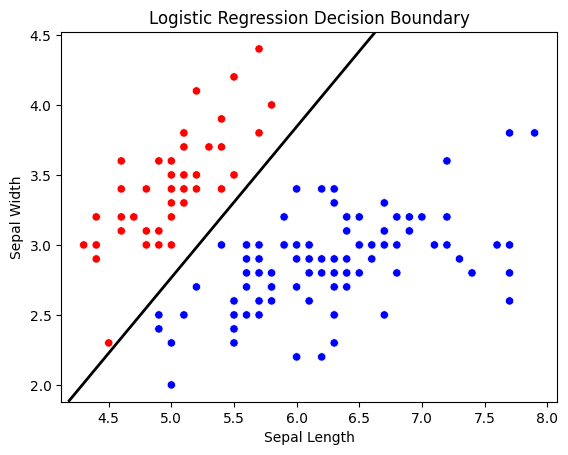

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Consider only two features for binary classification
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)  # 1 if setosa, 0 otherwise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot decision boundary
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: 'blue', 1: 'red'}, marker='o', legend=False)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform Leave-One-Out cross-validation
predictions = []
true_labels = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Make predictions on the test sample
    y_pred = knn.predict(X_test)

    # Store predictions and true labels
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Compute accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Leave-One-Out Cross-Validation Accuracy: {accuracy:.2f}')


Leave-One-Out Cross-Validation Accuracy: 0.96


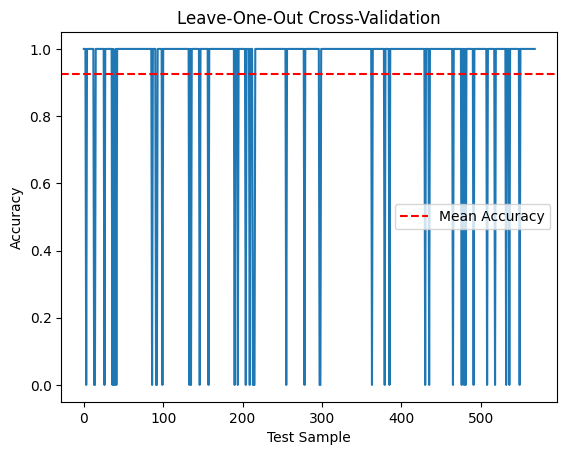

Mean Accuracy: 0.93


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform Leave-One-Out cross-validation
accuracies = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Make predictions on the test sample
    y_pred = knn.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Compute mean accuracy
mean_accuracy = np.mean(accuracies)

# Plot the accuracies
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Test Sample')
plt.ylabel('Accuracy')
plt.title('Leave-One-Out Cross-Validation')
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label='Mean Accuracy')
plt.legend()
plt.show()

# Print the mean accuracy
print(f'Mean Accuracy: {mean_accuracy:.2f}')


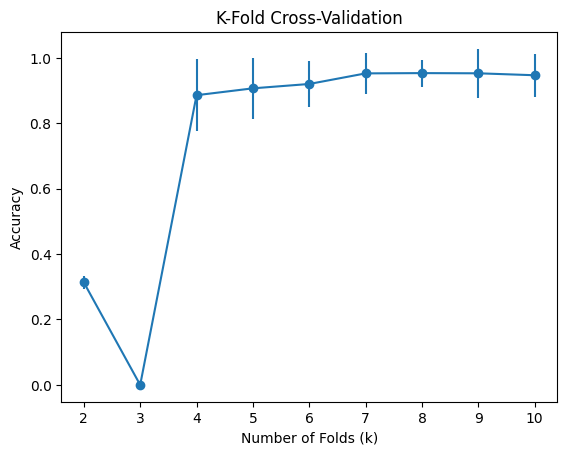

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Perform k-fold cross-validation
k_values = range(2, 11)
mean_scores = []
std_scores = []

for k in k_values:
    kf = KFold(n_splits=k)
    scores = cross_val_score(knn, X, y, cv=kf)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Plot the mean and standard deviation of the scores
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation')
plt.show()


In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50
4/4 [==============================] - 1s 6ms/step - loss: 1.1836 - accuracy: 0.3167
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 1.1540 - accuracy: 0.3167
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 1.1275 - accuracy: 0.3167
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 1.1007 - accuracy: 0.3167
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0748 - accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0500 - accuracy: 0.3417
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 1.0257 - accuracy: 0.3667
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0026 - accuracy: 0.3750
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9796 - accuracy: 0.4083
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9575 - accuracy: 0.4333
Epoch 11/50
4/4 [======================

Accuracy: 45.00%


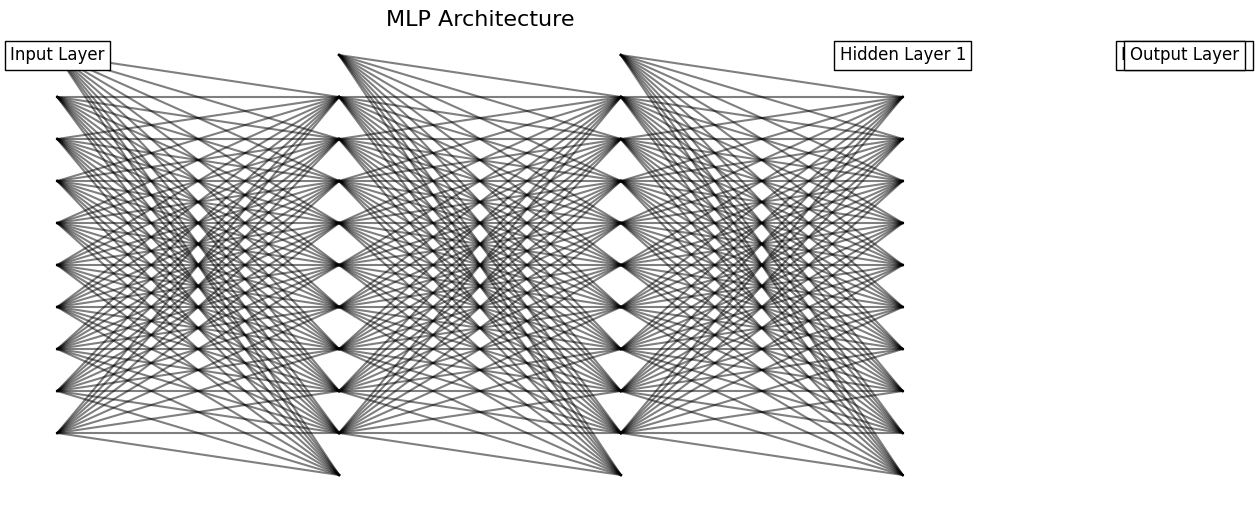

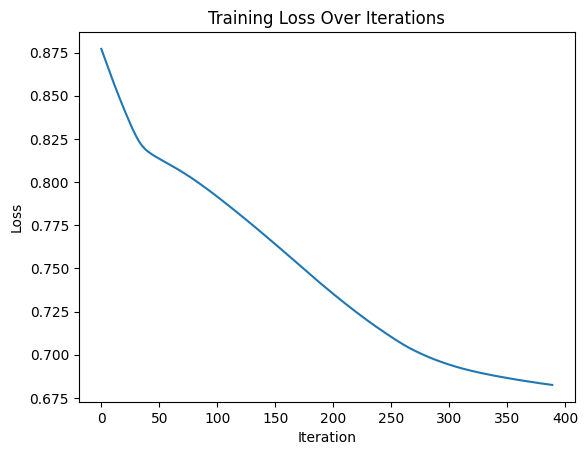

In [1]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Dummy data for illustration
X, y = np.random.rand(100, 3), np.random.choice([0, 1], size=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

# Train the model
history = mlp.fit(X_train, y_train)

# Make predictions on the test set
predictions = mlp.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the model architecture
fig, ax = plt.subplots(figsize=(12, 6))

# Input layer
ax.text(0.1, 0.8, 'Input Layer', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

# Hidden layers
num_hidden_layers = len(mlp.hidden_layer_sizes)
for i in range(num_hidden_layers):
    ax.text(0.5 + (i + 1) * 0.2, 0.8, f'Hidden Layer {i + 1}', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

# Output layer
ax.text(0.9, 0.8, 'Output Layer', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

# Connection lines
for i in range(num_hidden_layers + 1):
    for j in range(10):  # Assuming 10 nodes in each layer
        for k in range(10):  # Assuming 10 nodes in each layer
            ax.plot([0.1 + i * 0.2, 0.3 + i * 0.2], [0.8 - j * 0.1, 0.8 - (k + 1) * 0.1], color='black', alpha=0.5)

ax.axis('off')
plt.title('MLP Architecture', fontsize=16)
plt.show()

# Plot the training loss over iterations
plt.plot(history.loss_curve_)
plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


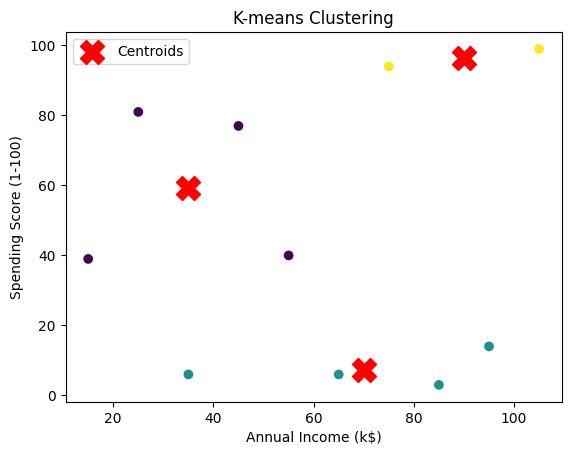

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a sample dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'AnnualIncome (k$)': [15, 25, 35, 45, 55, 65, 75, 85, 95, 105],
    'SpendingScore (1-100)': [39, 81, 6, 77, 40, 6, 94, 3, 14, 99]
}

df = pd.DataFrame(data)

# Extract features for clustering
X = df[['AnnualIncome (k$)', 'SpendingScore (1-100)']]

# Choose the number of clusters (K)
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(df['AnnualIncome (k$)'], df['SpendingScore (1-100)'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()




c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


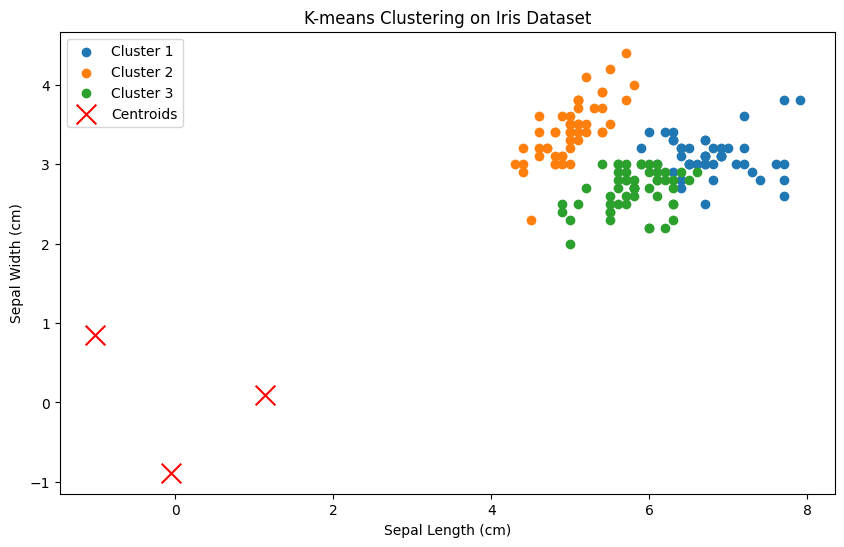

In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Loading the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Scaling the features for better results
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Let's assume we want to find 3 clusters (since we know there are 3 types of iris flowers)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the K-means model
kmeans.fit(iris_scaled)

# Adding the predicted labels to the original dataset
iris_df['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))

for cluster in range(3):
    cluster_data = iris_df[iris_df['cluster_label'] == cluster]
    plt.scatter(cluster_data['sepal length (cm)'], cluster_data['sepal width (cm)'],
                label=f'Cluster {cluster + 1}')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, color='red', label='Centroids')

plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

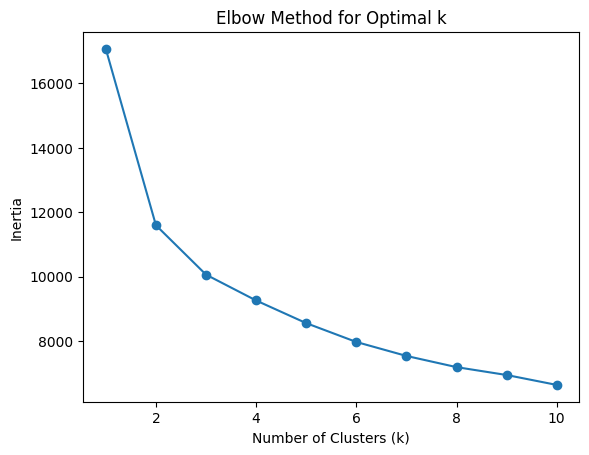

c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Let's scale the features for better performance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Now, let's choose the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the graph, let's say k=2 is a reasonable choice

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Now, you can explore your clustered data!
print(df.head())


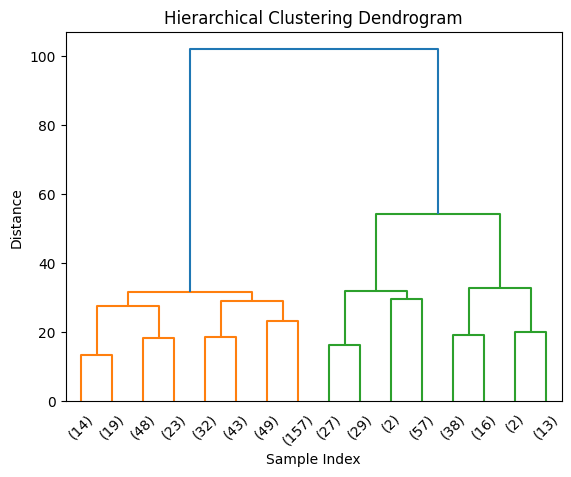

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Let's scale the features for better performance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Create a linkage matrix using the Ward method
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram to help determine the number of clusters
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, you can choose a suitable number of clusters

# Apply Agglomerative Clustering with the chosen number of clusters
num_clusters = 2  # Adjust based on the dendrogram
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df['Cluster'] = hierarchical_clustering.fit_predict(df_scaled)

# Now, check out your clustered data!
print(df.head())


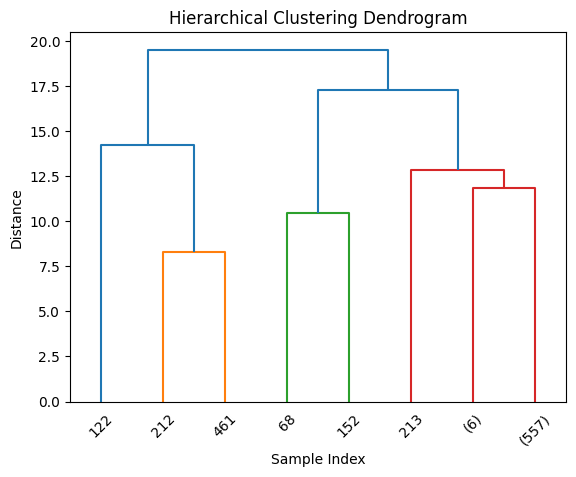

In [4]:
# linkage_matrix = linkage(df_scaled, method='average', metric='euclidean')
linkage_matrix = linkage(df_scaled, method='average')


# Plot the dendrogram to help determine the number of clusters
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

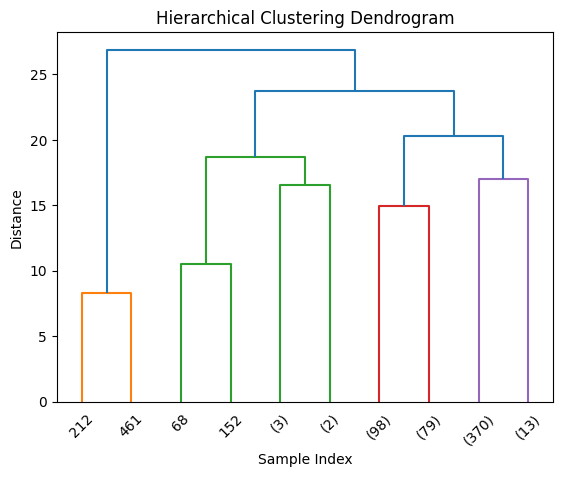

In [5]:
# linkage_matrix = linkage(df_scaled, method='average', metric='euclidean')
linkage_matrix = linkage(df_scaled, method='complete')


# Plot the dendrogram to help determine the number of clusters
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

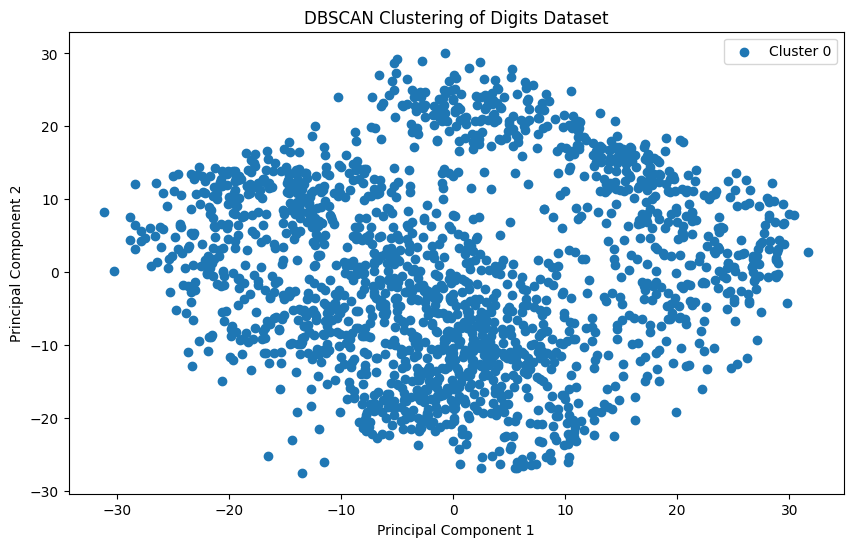

In [5]:
# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
data = digits.data
target = digits.target

# Let's reduce the dimensionality for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Apply DBSCAN
dbscan = DBSCAN(eps=7, min_samples=5)
labels = dbscan.fit_predict(data_2d)

# Visualize the clustered data
plt.figure(figsize=(10, 6))

# Plot the points with different colors for each cluster
for i in range(len(set(labels))):
    plt.scatter(data_2d[labels == i, 0], data_2d[labels == i, 1], label=f'Cluster {i}')

plt.title('DBSCAN Clustering of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


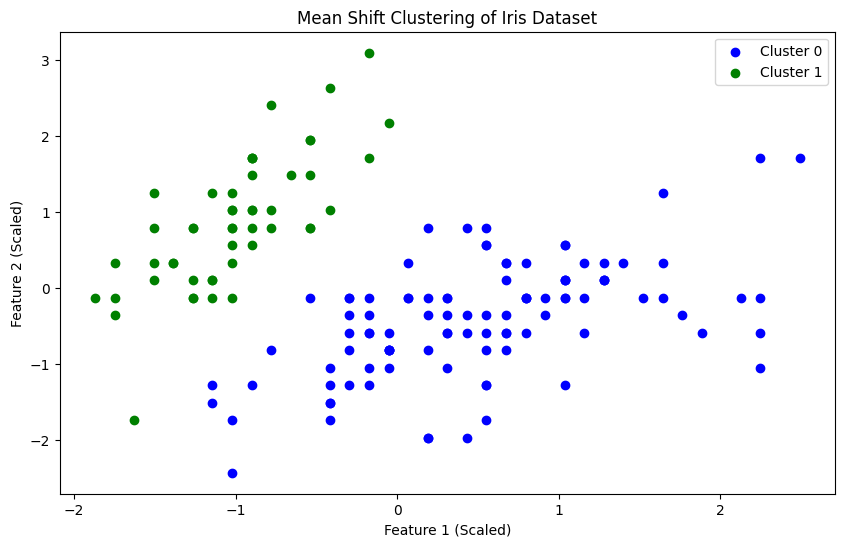

In [6]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import cycle

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Let's scale the features for better performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Mean Shift clustering
mean_shift = MeanShift()
labels = mean_shift.fit_predict(data_scaled)

# Visualize the clustered data
plt.figure(figsize=(10, 6))

# Plot the points with different colors for each cluster
colors = cycle('bgrcmy')
for i, col in zip(range(len(set(labels))), colors):
    plt.scatter(data_scaled[labels == i, 0], data_scaled[labels == i, 1], color=col, label=f'Cluster {i}')

plt.title('Mean Shift Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()


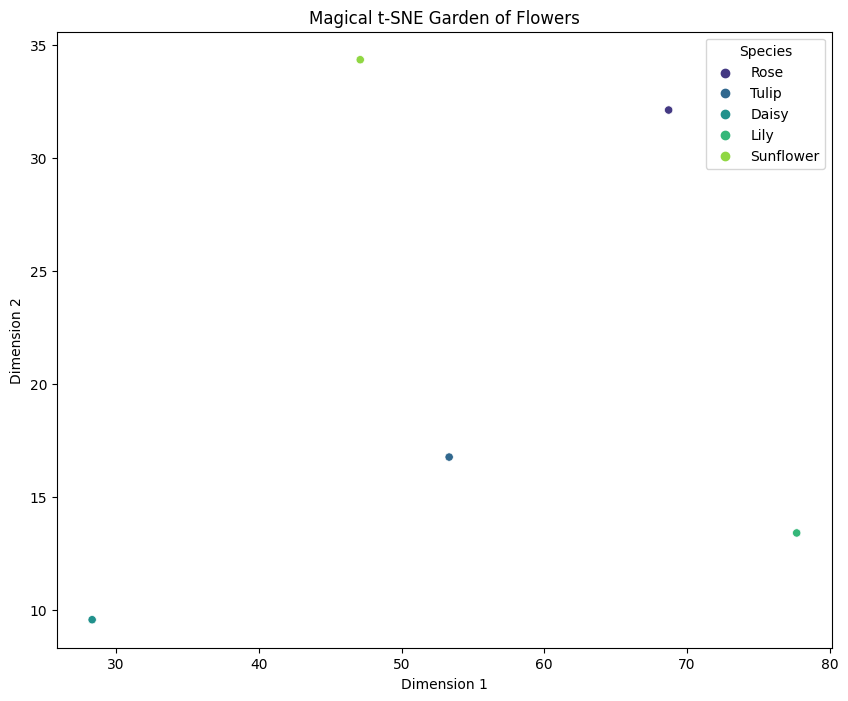

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating a magical dataset
flowers_data = pd.DataFrame({
    'species': ['Rose', 'Tulip', 'Daisy', 'Lily', 'Sunflower'],
    'petal_length': [5.1, 4.0, 1.2, 6.3, 4.5],
    'petal_width': [3.5, 2.5, 0.3, 1.8, 1.5],
    'sepal_length': [1.4, 1.0, 0.2, 2.5, 2.3],
    'sepal_width': [0.2, 0.5, 0.1, 0.8, 1.0]
})

# Casting the spell with a proper perplexity
tsne = TSNE(n_components=2, perplexity=3, random_state=42)  # Adjust perplexity as needed
flowers_tsne = tsne.fit_transform(flowers_data[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']])

# Creating a new DataFrame with the transformed data
tsne_df = pd.DataFrame(data=flowers_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Species'] = flowers_data['species']

# Visualizing the enchanted garden
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Species', data=tsne_df, palette='viridis', legend='full')
plt.title('Magical t-SNE Garden of Flowers')
plt.show()


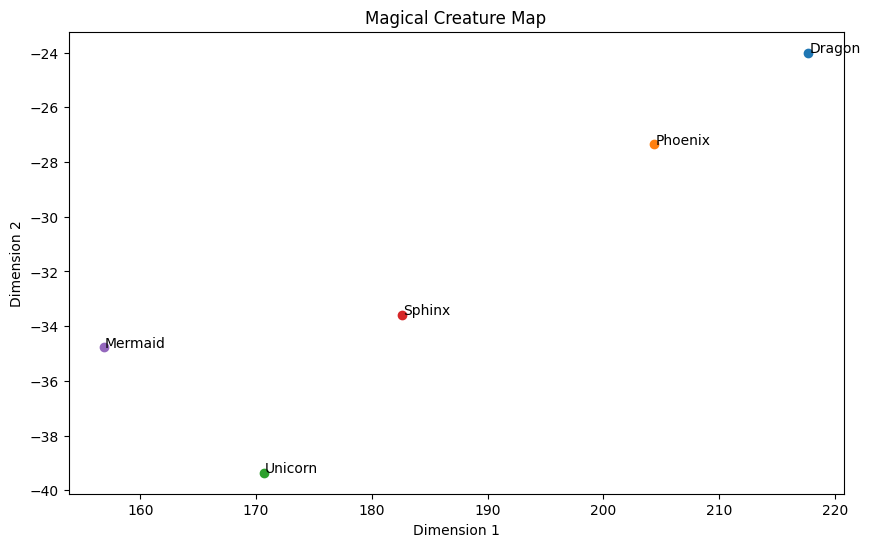

In [15]:
import pandas as pd

# Creating a mythical dataset
data = {
    'Creature': ['Dragon', 'Phoenix', 'Unicorn', 'Sphinx', 'Mermaid'],
    'Wingspan': [30, 20, 5, 10, 0],
    'Fire_Breath': [True, True, False, False, False],
    'Shimmeriness': [10, 8, 5, 7, 9]
}

df = pd.DataFrame(data)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extracting features for t-SNE
features = df.drop('Creature', axis=1)

# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
transformed_data = tsne.fit_transform(features)

# Creating a new DataFrame for visualization
tsne_df = pd.DataFrame(data=transformed_data, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Creature'] = df['Creature']

# Plotting the magical creatures on the 2D map
plt.figure(figsize=(10, 6))
for i in range(len(tsne_df)):
    plt.scatter(tsne_df['Dimension 1'][i], tsne_df['Dimension 2'][i])
    plt.text(tsne_df['Dimension 1'][i] + 0.1, tsne_df['Dimension 2'][i], tsne_df['Creature'][i])

plt.title('Magical Creature Map')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

